# Predicting Stock Prices

## Introduction:
In this project we are going to be using data of stock prices from 1950 up to 2015 to train a model to predict stock prices. We are going to use different `scikit-learn` models and compare how they all perform.

We are going to be performing the following tasks:
1. Read the csv file into a pandas DataFrame.
2. Convert the `Date` column into a datetime object.
3. Sort the DataFrame by date in ascending order.
4. Calculate the rolling mean for the past 30 days for each of the columns except the `Date` column.
5. Use the `DataFrame.shift()` method to shift the rolling values by 1 day. This is because when calculating rolling mean, the value for that day is also included, so we have to shift it to prevent leaking data to the model.
6. Make predictions using the rolling columns.

In [1]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

## Data Exploration

In [2]:
stocks = pd.read_csv('sphist.csv')
stocks.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


In [3]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16590 entries, 0 to 16589
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       16590 non-null  object 
 1   Open       16590 non-null  float64
 2   High       16590 non-null  float64
 3   Low        16590 non-null  float64
 4   Close      16590 non-null  float64
 5   Volume     16590 non-null  float64
 6   Adj Close  16590 non-null  float64
dtypes: float64(6), object(1)
memory usage: 907.4+ KB


There are no null columns in the dataset. To proceed, we are going to convert the `Date` column into a datetime object

In [4]:
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16590 entries, 0 to 16589
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       16590 non-null  datetime64[ns]
 1   Open       16590 non-null  float64       
 2   High       16590 non-null  float64       
 3   Low        16590 non-null  float64       
 4   Close      16590 non-null  float64       
 5   Volume     16590 non-null  float64       
 6   Adj Close  16590 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 907.4 KB


## Data Cleaning

In [5]:
stocks.sort_values('Date', ascending=True, inplace=True)

stocks = stocks.reset_index(drop=True)

stocks.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000.0,16.660000
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000.0,16.850000
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000.0,16.930000
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000.0,16.980000
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000.0,17.080000
5,1950-01-10,17.030001,17.030001,17.030001,17.030001,2160000.0,17.030001
6,1950-01-11,17.090000,17.090000,17.090000,17.090000,2630000.0,17.090000
7,1950-01-12,16.760000,16.760000,16.760000,16.760000,2970000.0,16.760000
8,1950-01-13,16.670000,16.670000,16.670000,16.670000,3330000.0,16.670000
9,1950-01-16,16.719999,16.719999,16.719999,16.719999,1460000.0,16.719999


In [6]:
stocks.columns = stocks.columns.str.lower()
stocks.index = stocks["date"]

In [7]:
stocks = stocks.drop("date", axis=1)

## Predicting Stock Prices

To do this we are going to split the dataset into a test and training dataset. The train dataset will contain data up to 31st of December 2012 while the test dataset will contain data from  1st of January 2013 and above.

Text(0.5, 1.0, 'Change In Stock Prices(1950 - 2015)')

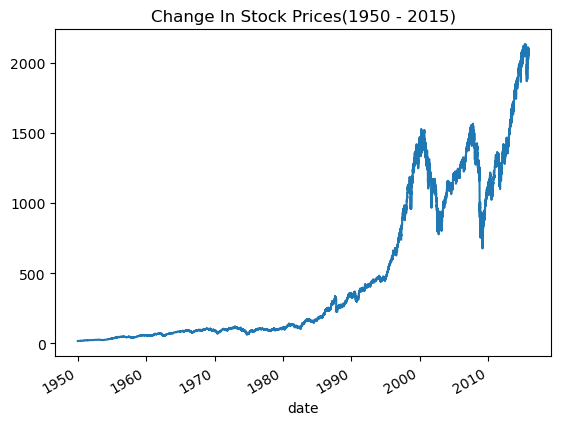

In [8]:
stocks["close"].plot()
plt.title("Change In Stock Prices(1950 - 2015)")

In [9]:
predictors = stocks.columns.drop(["close", "adj close"])
predictors

Index(['open', 'high', 'low', 'volume'], dtype='object')

In [10]:
model = LinearRegression()

In [11]:
#splitting the data
train = stocks.loc[:datetime(2013, 1, 1)].copy()
test = stocks.loc[datetime(2013, 1, 1):].copy()

In [12]:
def get_rmse(data, predictors, target, model):
    """Function to compute the mean squared error between predicted values and the actual values"""
    train = data.loc[:datetime(2013, 1, 1)].copy()
    test = data.loc[datetime(2013, 1, 1):].copy()
    model.fit(train[predictors], train[target])
    predictions = model.predict(test[predictors])
    error = mean_absolute_error(test[target], predictions)
    return error, predictions
    

In [13]:
#finding the best columns
for column in predictors:
    error, _ = get_rmse(data = stocks, predictors = [column], target = "close", model = model)
    print(f"{column}:{error}")

open:10.360223098170767
high:8.766658684677052
low:7.943219094494724
volume:748.5794971719075


When the model is fitted with each of the individual columns from our predictors, we can see, the volume column is not a good predictor for predicting the stock prices. It had a very huge rmse value and so going forward, we are going to rain the model with all the other columns except the volume column.

In [14]:
predictors = predictors.drop("volume")
error, predictions = get_rmse(data = stocks, predictors = predictors, target = "close", model = model)
error



3.8395786670207315

When we used all 3 predictors to make predictions on the prices, we reduced the rmse value considerably to 3.84. To improve on the model's performance, we are going to compute the rolling averages of the predictors for a 1 month window, a 3 months window, a 6 months window and a 1 year window.

### Computing Rolling Averages
Since the stock markets don't trade during the weekends, we know that on average there are 21 trading days in a month, 63 in a quarter, 126 in half a year and 252 in a year. We are going to be using these numbers to compute the rolling averages.

When computing rolling averages, the value for the last day in the window is usually included and so to prevent leakage in our model, we are going to shift the values forward by one day using the `pandas.DataFrame.shift` method.

In [15]:
def compute_rolling_window(data, window):
    """Function to compute the rolling averages of open, high and low columns"""
    new_data = data.copy()
    for column in new_data.columns.drop(["close", "adj close", "volume"]):
        new_data["rolling_" + column] = new_data[column].rolling(window).mean()
    
    rolling_columns = [col for col in new_data.columns if "rolling" in col]
    new_data[rolling_columns] = new_data[rolling_columns].shift(1) # shifts the rolling averages forward by 1 day
    new_data = new_data.dropna() # remove NA values caused by computing rolling average
    
    return new_data, rolling_columns
    

In [16]:
monthly_stocks, new_predictors = compute_rolling_window(stocks, 21)
monthly_stocks

,open,high,low,close,volume,adj close,rolling_open,rolling_high,rolling_low
date,,,,,,,,,
1950-02-01,17.049999,17.049999,17.049999,17.049999,1.810000e+06,17.049999,16.875714,16.875714,16.875714
1950-02-02,17.230000,17.230000,17.230000,17.230000,2.040000e+06,17.230000,16.894286,16.894286,16.894286
1950-02-03,17.290001,17.290001,17.290001,17.290001,2.210000e+06,17.290001,16.912381,16.912381,16.912381
1950-02-06,17.320000,17.320000,17.320000,17.320000,1.490000e+06,17.320000,16.929524,16.929524,16.929524
1950-02-07,17.230000,17.230000,17.230000,17.230000,1.360000e+06,17.230000,16.945714,16.945714,16.945714
...,...,...,...,...,...,...,...,...,...
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2080.739037,2089.772874,2070.990473
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2080.402367,2090.203828,2071.161418
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2081.399984,2090.111927,2070.987613


In [17]:
monthly_error, _ = get_rmse(data = monthly_stocks, predictors = new_predictors, target = "close", model = model)
monthly_error

21.163166801204596

In [18]:
quarterly_stocks, _ = compute_rolling_window(stocks, 63)
quarterly_error, _ = get_rmse(data = quarterly_stocks, predictors = new_predictors, target = "close", model = model)
quarterly_error

33.68234951000263

In [19]:
halfyear_stocks, _ = compute_rolling_window(stocks, 126)
halfyear_error, _ = get_rmse(data = halfyear_stocks, predictors = new_predictors, target = "close", model = model)
halfyear_error

40.036386135607586

In [20]:
yearly_stocks, _ = compute_rolling_window(stocks, 252)
yearly_error, _ = get_rmse(data = yearly_stocks, predictors = new_predictors, target = "close", model = model)
yearly_error

65.22998394376563

Computing the rolling averages did not seem to improve the model, rather, the model got worst as the rolling window increased. So we are going to stick with our original model where we didn't use the rolling averages.

In [21]:
test = stocks.loc[datetime(2013, 1, 1):].copy()
test["predictions"] = predictions
test


,open,high,low,close,volume,adj close,predictions
date,,,,,,,
2013-01-02,1426.189941,1462.430054,1426.189941,1462.420044,4.202600e+09,1462.420044,1458.562867
2013-01-03,1462.420044,1465.469971,1455.530029,1459.369995,3.829730e+09,1459.369995,1459.277962
2013-01-04,1459.369995,1467.939941,1458.989990,1466.469971,3.424290e+09,1466.469971,1466.283449
2013-01-07,1466.469971,1466.469971,1456.619995,1461.890015,3.304970e+09,1461.890015,1458.263854
2013-01-08,1461.890015,1461.890015,1451.640015,1457.150024,3.601600e+09,1457.150024,1453.376219
...,...,...,...,...,...,...,...
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2100.681581
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2084.168884
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2054.103941


## Conclusion
The goal of the project was to predict stock prices using a simple linear regression model. So far, we can learn the following from this project:

* Computing the rolling averages didn't make the model perform better
* The model got worse as the rolling window increased.

While this project focused on predicting the absolute values of stock prices, another approach that can be taken is using a classifier model to predict whether stock prices for will either go up or go down.